#  Logistic Regression

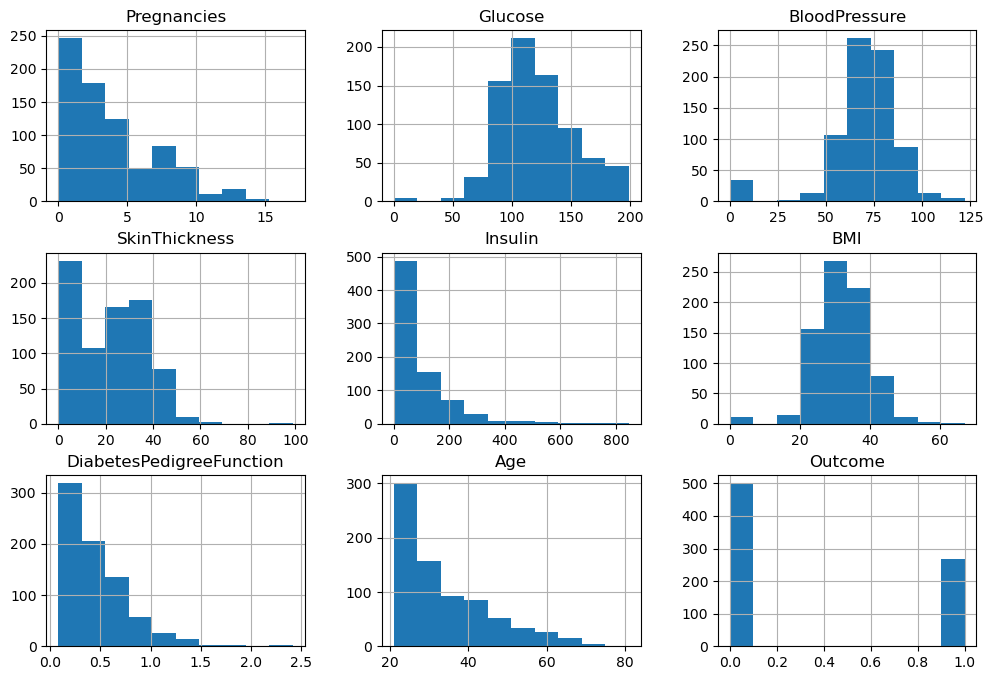

Accuracy score: 0.7467532467532467


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


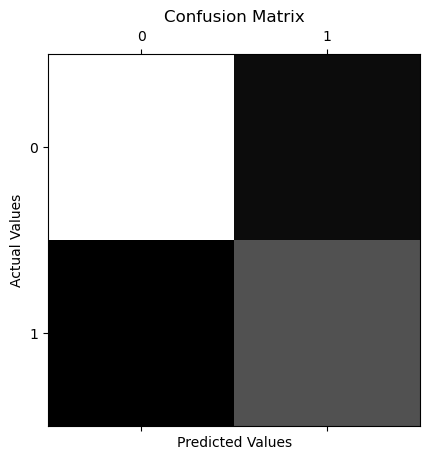

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



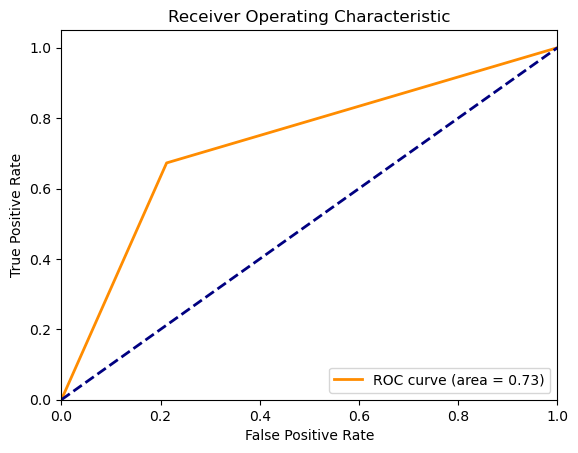

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('c:/Users/RMRAM/Downloads/Compressed/archive/diabetes.csv')

# display the first five rows of the dataset
df.head()

# check if there are any missing values
df.isnull().sum()

# get the summary statistics of the dataset
df.describe()

# plot histograms of the features
df.hist(figsize=(12,8))
plt.show()


# define the features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# create a logistic regression object
lr = LogisticRegression()

# fit the model on the training data
lr.fit(X_train, y_train)


# make predictions on the testing data
y_pred = lr.predict(X_test)

# get the accuracy score of the model
acc = accuracy_score(y_test, y_pred)
print('Accuracy score:', acc)

# plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# get the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)


# plot the ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
